# Обработка данных

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="darkgrid")

In [104]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.intersect_with_DeepZ.bed

--2022-02-07 20:19:18--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.intersect_with_DeepZ.bed
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.intersect_with_DeepZ.bed [following]
--2022-02-07 20:19:19--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.intersect_with_DeepZ.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 303183 (296K) [text/plain]
Saving to: ‘H2AFZ_brain.intersect_with_DeepZ.bed.3’

H2AFZ_brain.interse 100%[===================>] 296.08K  --.-KB/s   

In [105]:
pos = pd.read_csv('H2AFZ_brain.intersect_with_DeepZ.bed', sep='\t', names=['chr', 'start', 'end'])

In [106]:
pos

,chr,start,end
0,chr1,762665,762892
1,chr1,894548,894874
2,chr1,934027,934044
3,chr1,975932,976162
4,chr1,1004735,1004904
...,...,...,...
12701,chrY,2709577,2709618
12702,chrY,2709789,2709805
12703,chrY,13458427,13458504
12704,chrY,13833280,13833404


In [107]:
pos['len'] = pos['end'] - pos['start']

In [108]:
pos['center'] = (pos['start'] + pos['end']) // 2

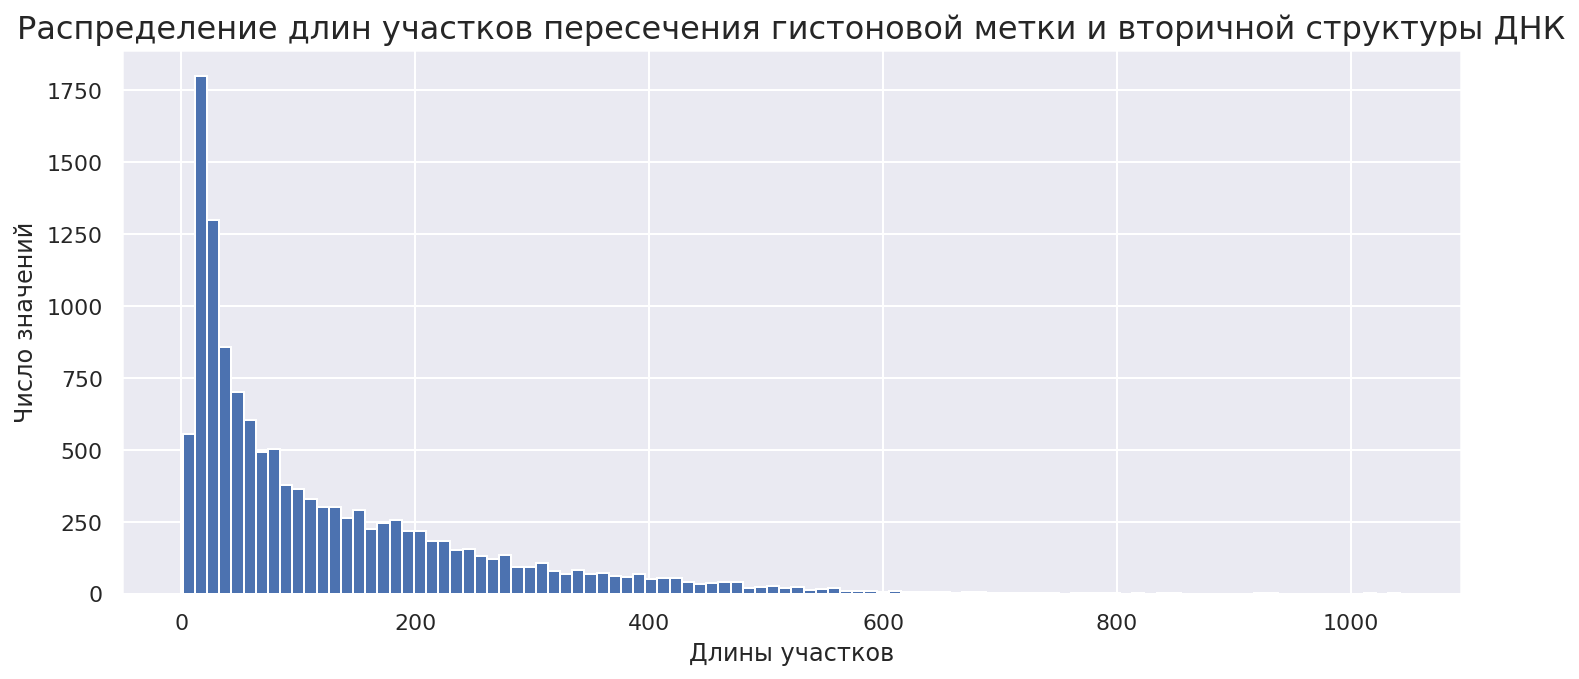

In [109]:
plt.rcParams['figure.figsize'] = 12, 5
plt.rcParams['font.size'] = 12
plt.hist(pos['end'] - pos['start'], bins=100)
plt.title('Распределение длин участков пересечения гистоновой метки и вторичной структуры ДНК', size=16)
plt.xlabel('Длины участков')
plt.ylabel('Число значений')
plt.show()

In [110]:
pos['len'].value_counts()

11     269
12     220
15     207
14     203
13     200
      ... 
533      1
677      1
595      1
455      1
531      1
Name: len, Length: 632, dtype: int64

In [111]:
pos['start'] = pos['center'] - 100

In [112]:
pos['end'] = pos['center'] + 100

In [113]:
pos

,chr,start,end,len,center
0,chr1,762678,762878,227,762778
1,chr1,894611,894811,326,894711
2,chr1,933935,934135,17,934035
3,chr1,975947,976147,230,976047
4,chr1,1004719,1004919,169,1004819
...,...,...,...,...,...
12701,chrY,2709497,2709697,41,2709597
12702,chrY,2709697,2709897,16,2709797
12703,chrY,13458365,13458565,77,13458465
12704,chrY,13833242,13833442,124,13833342


In [114]:
pos = pos.drop(columns=['len', 'center'])
pos = pos.drop_duplicates()

In [121]:
pos.drop(np.arange(1000, 12706), inplace=True)

In [122]:
!wget https://www.dropbox.com/s/5mps86dwoymdhil/Genome.bed

--2022-02-07 20:21:07--  https://www.dropbox.com/s/5mps86dwoymdhil/Genome.bed
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5mps86dwoymdhil/Genome.bed [following]
--2022-02-07 20:21:08--  https://www.dropbox.com/s/raw/5mps86dwoymdhil/Genome.bed
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb2cc6378dd1616bca93dbd2790.dl.dropboxusercontent.com/cd/0/inline/BfTL-hsYzzfHzRArj95PPNqCqUIDVfi-bzGpglHFoHAN-5DxnTV7URvCieyJWSuyV_TE5Sjq8IL38mlVWOfTlqnGLJpjfL-s3IhGAW6ILjUBFMusLCG5H9dYH9bCkgUw_LMnmA1C2t0_d6C-Bo1Li4Lo/file# [following]
--2022-02-07 20:21:08--  https://ucb2cc6378dd1616bca93dbd2790.dl.dropboxusercontent.com/cd/0/inline/BfTL-hsYzzfHzRArj95PPNqCqUIDVfi-bzGpglHFoHAN-5DxnTV7URvCieyJWSuyV_TE5Sjq8IL38mlVWOfTlqnGLJpjfL-s

In [123]:
!wget http://hgdownload.cse.ucsc.edu/admin/exe/linux.x86_64/twoBitToFa
!chmod a+x twoBitToFa

--2022-02-07 20:21:09--  http://hgdownload.cse.ucsc.edu/admin/exe/linux.x86_64/twoBitToFa
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9394032 (9.0M)
Saving to: ‘twoBitToFa.2’

twoBitToFa.2        100%[===================>]   8.96M  12.8MB/s    in 0.7s    

2022-02-07 20:21:10 (12.8 MB/s) - ‘twoBitToFa.2’ saved [9394032/9394032]



In [124]:
for i in range(pos.shape[0]):
    name = pos.iloc[i, :]['chr']
    start = pos.iloc[i, :]['start']
    end = pos.iloc[i, :]['end']
    file_name = str(i) + 'z.fa'
    !./twoBitToFa http://hgdownload.cse.ucsc.edu/gbdb/hg19/hg19.2bit $file_name -seq=$name -start=$start -end=$end

In [125]:
!cat *z.fa > pos.fa

In [126]:
genome = pd.read_csv('Genome.bed', sep='\t', header=None)

In [127]:
genome

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,66999043,67216822,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
1,chr1,66999043,67216822,NM_001376535.1,0,+,67000041,67208778,0,26,"47,123,64,25,72,57,55,176,12,12,25,52,86,93,75...","0,885,92486,99709,102583,106416,109449,110183,..."
2,chr1,66999275,67216822,NM_001376554.1,0,+,67000041,67208778,0,21,"80,123,64,25,57,55,176,25,52,86,93,75,128,127,...","0,653,92254,99477,106184,109217,109951,137402,..."
3,chr1,66999275,67216822,NM_001376551.1,0,+,67000041,67208778,0,22,"80,123,64,25,57,55,176,25,52,86,93,75,128,127,...","0,653,92254,99477,106184,109217,109951,137402,..."
4,chr1,66999275,67216822,NM_001308203.2,0,+,67000041,67208778,0,22,"80,123,64,25,57,55,176,25,52,86,93,75,128,127,...","0,653,92254,99477,106184,109217,109951,137402,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
87140,chr7_gl000195_random,42937,86735,NM_001242480.3,0,-,44723,49117,0,4,"1986,165,60,218,","0,6017,31183,43580,"
87141,chr7_gl000195_random,42937,86735,NM_001347680.2,0,-,46775,49117,0,3,"3864,165,218,","0,6017,43580,"
87142,chr7_gl000195_random,42937,86735,NM_001347681.2,0,-,44723,49117,0,3,"1986,165,218,","0,6017,43580,"
87143,chr7_gl000195_random,42937,86735,NR_144628.2,0,-,86735,86735,0,2,"1986,218,","0,43580,"


In [128]:
! apt-get install bedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bedtools is already the newest version (2.26.0+dfsg-5).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

Скачаем вторичную структуру ДНК и гистоновую метку:

In [129]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/DeepZ.bed

--2022-02-07 20:26:51--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/DeepZ.bed
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/DeepZ.bed [following]
--2022-02-07 20:26:52--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/DeepZ.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461744 (451K) [text/plain]
Saving to: ‘DeepZ.bed.1’

DeepZ.bed.1         100%[===================>] 450.92K  --.-KB/s    in 0.04s   

2022-02-07 20:26:52 (11.9 MB/s) - ‘DeepZ.bed.1’ saved [461744/461744]



In [130]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.merge.hg19.bed

--2022-02-07 20:26:53--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.merge.hg19.bed
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.merge.hg19.bed [following]
--2022-02-07 20:26:54--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.merge.hg19.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4717002 (4.5M) [text/plain]
Saving to: ‘H2AFZ_brain.merge.hg19.bed.1’

H2AFZ_brain.merge.h 100%[===================>]   4.50M  --.-KB/s    in 0.08s   

2022-02-07 20:26:54 (59.9

In [131]:
!bedtools subtract -a Genome.bed -b DeepZ.bed > gg.bed

In [132]:
!bedtools subtract -a gg.bed -b H2AFZ_brain.merge.hg19.bed > neg.bed

In [133]:
neg = pd.read_csv('neg.bed', sep='\t')
neg.columns = ['chr', 'start', 'end', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [134]:
neg

,chr,start,end,4,5,6,7,8,9,10,11,12
0,chr1,67000151,67029050,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
1,chr1,67029403,67050894,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
2,chr1,67051081,67064393,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
3,chr1,67064601,67113817,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
4,chr1,67113988,67141796,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
410836,chr7_gl000195_random,42937,86735,NM_001242480.3,0,-,44723,49117,0,4,"1986,165,60,218,","0,6017,31183,43580,"
410837,chr7_gl000195_random,42937,86735,NM_001347680.2,0,-,46775,49117,0,3,"3864,165,218,","0,6017,43580,"
410838,chr7_gl000195_random,42937,86735,NM_001347681.2,0,-,44723,49117,0,3,"1986,165,218,","0,6017,43580,"
410839,chr7_gl000195_random,42937,86735,NR_144628.2,0,-,86735,86735,0,2,"1986,218,","0,43580,"


In [135]:
pos[pos['end'] - pos['start'] == 500]

,chr,start,end


In [136]:
neg[neg['end'] - neg['start'] >= 100]

,chr,start,end,4,5,6,7,8,9,10,11,12
0,chr1,67000151,67029050,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
1,chr1,67029403,67050894,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
2,chr1,67051081,67064393,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
3,chr1,67064601,67113817,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
4,chr1,67113988,67141796,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
410836,chr7_gl000195_random,42937,86735,NM_001242480.3,0,-,44723,49117,0,4,"1986,165,60,218,","0,6017,31183,43580,"
410837,chr7_gl000195_random,42937,86735,NM_001347680.2,0,-,46775,49117,0,3,"3864,165,218,","0,6017,43580,"
410838,chr7_gl000195_random,42937,86735,NM_001347681.2,0,-,44723,49117,0,3,"1986,165,218,","0,6017,43580,"
410839,chr7_gl000195_random,42937,86735,NR_144628.2,0,-,86735,86735,0,2,"1986,218,","0,43580,"


In [137]:
neg.loc[neg['end'] - neg['start'] >= 200, 'end'] = neg['start'] + 200

In [138]:
neg = neg.loc[neg['end'] - neg['start'] == 200].sample(pos.shape[0])
neg

,chr,start,end,4,5,6,7,8,9,10,11,12
144654,chr6,38588225,38588425,NM_001099272.2,0,-,38142760,38565870,0,11,"6732,79,108,190,110,120,220,265,364,212,130,","0,24068,87958,119821,176533,409149,411767,4241..."
404185,chr6_mcf_hap5,3110469,3110669,NM_001039651.1,0,+,3110528,3112005,0,5,"173,141,96,90,415,","0,419,1068,1270,1440,"
169010,chr7,17830384,17830584,NM_015132.5,0,-,17833668,17979918,0,26,"3532,113,69,146,72,162,111,108,140,70,38,133,1...","0,6065,7928,8247,10826,12657,24072,25420,30747..."
158305,chr6,89805677,89805877,NM_001376897.1,0,-,89808296,89814968,0,5,"2989,142,124,344,249,","0,9160,9468,10722,21864,"
54031,chr2,178938227,178938427,NM_001077197.2,0,-,178494134,178969190,0,21,"6319,84,75,64,78,101,91,110,108,147,51,93,68,7...","0,40622,46249,52211,57582,74088,77877,88525,10..."
...,...,...,...,...,...,...,...,...,...,...,...,...
50570,chr2,114003599,114003799,NM_013953.4,0,-,113977668,114035971,0,10,"2613,87,102,176,123,89,198,166,100,91,","0,4095,11158,25554,26011,26693,28430,30757,623..."
331903,chr16,73248621,73248821,NM_001386735.1,0,-,72821062,72994044,0,17,"5964,5460,103,201,134,81,232,497,2768,364,127,...","0,10370,17142,28692,29020,46894,106846,167584,..."
102661,chr4,113948736,113948936,NM_001354257.2,0,+,113825649,114302627,0,45,"160,60,102,99,99,99,186,24,99,99,99,198,99,99,...","0,86350,356311,378263,380906,414056,418882,419..."
111744,chr4,140047192,140047392,NM_001331036.3,0,-,139980136,140058855,0,10,"2343,351,193,87,174,114,166,238,85,252,","0,3059,4600,10419,14601,16189,67899,80365,8214..."


In [139]:
neg[["chr", "start", "end", "4"]].to_csv('neg.bed', index=None, sep="\t", header=None)

In [140]:
neg.shape

(1000, 12)

In [141]:
!head neg.bed

chr6	38588225	38588425	NM_001099272.2
chr6_mcf_hap5	3110469	3110669	NM_001039651.1
chr7	17830384	17830584	NM_015132.5
chr6	89805677	89805877	NM_001376897.1
chr2	178938227	178938427	NM_001077197.2
chr21	38163034	38163234	NM_001352518.2
chr4	119886312	119886512	NM_001286755.2
chr9	78937842	78938042	NM_001190482.2
chr4	139859848	139860048	NR_133945.1
chr1	162760491	162760691	NM_016371.4


In [142]:
!./twoBitToFa http://hgdownload.cse.ucsc.edu/gbdb/hg19/hg19.2bit -bed=neg.bed neg.fa

In [143]:
!head neg.fa

>NM_001099272.2
gatagccctcatctgtttggtcagatattggcccaagatctaggccactt
ctcaagtccaggcactctggtccttcagtatgtggatgatttacttttgg
ctaccagtttggaagcctcatgccagcaggctactctagatctcctgaac
cttctagctaatcaagggtacaaagcatctaaaccgaaggcccagctctg
>NM_001039651.1
GGAGGGACCAGCCCGGGCTGCACCAGTGGGAGTGGCTCCACCCTTCCCAC
CTCAGAGCCATGGGGAGCCAGGGCTCTGGCGGGGTGCCCTTGGTGCAGGC
TCCCTACACAGTCCTGCTGCTGCCGCTGGGGACAAGCCGCCAAGACCCAG
GGGCCCAGAGCTTCTTCCTTTGGGTGAGTATCAGCCCAACAAGAGGTCCC


# Собственно нейросеть

In [144]:
__author__ = 'jasperz'
import os
import numpy as np
import tensorflow.compat.v1 as tf
import time
import math
import sys

In [145]:
# An object of this class represents a neural network, which you can build, print, train, evaluate, save and load.
# Below, the functions are discussed in detail.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
class NetworkModel:
    tf.disable_v2_behavior()

    # The constructor function
    def __init__(self, file_to_load = None):
        tf.reset_default_graph()
        self.all_layers = []

        gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.1)
        config = tf.ConfigProto(gpu_options=gpu_options)
        config.gpu_options.allow_growth = True

        self.sess = tf.Session(config=config)

        if not file_to_load:
            self.X_placeholder = tf.placeholder(tf.float32, [None, 200, 4],name='X_placeholder')
            self.Y_placeholder = tf.placeholder(tf.float32, [None, 2],name='Y_placeholder')
            self.loaded = False
            self.nn = None
        else:
            self.loaded = True
            self._loadNetworkParameters('models/'+file_to_load)
            self.X_placeholder = tf.get_default_graph().get_tensor_by_name('X_placeholder:0')
            self.Y_placeholder = tf.get_default_graph().get_tensor_by_name('Y_placeholder:0')
            self.predictions_softmax = tf.get_default_graph().get_tensor_by_name('softmax_prediction:0')

    # Adding the input layer
    def addInputLayer(self):
        assert len(self.all_layers) == 0, 'The input layer should be the first layer of the network, and can only be added once.'
        self.all_layers.append(('Input layer','',self.X_placeholder))

    # Adding a convolution layer
    def addConvLayer(self, num_of_filters, filter_width, zero_padding = True):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert zero_padding in (True,False), 'zero_padding should be True or False (boolean)'
        assert 0 < num_of_filters < 500, 'The number of filters specified should be a positive number, smaller than 500'
        assert 0 < filter_width < 64, 'The width of your filters should be a positive number, smaller than 64'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        assert 'Fully-connected layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a convolutional layer after a fully-connected layer'
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a convolutional layer after a softmax layer'
        prev_width = self.all_layers[-1][-1].shape[1]
        assert zero_padding or prev_width >= filter_width, 'You cannot add a (non-zeropadded) convolution of width {} when the previous layer has an output width of {}'.format(filter_width,prev_width)
        self.all_layers.append(('Convolutional layer',
                                '{} filters, width {}, {}zero padding, with ReLU'.format(num_of_filters,
                                                                                         filter_width,
                                                                                         'no ' if not zero_padding else ''),
                                tf.layers.conv1d(self.all_layers[-1][-1],
                                                 filters=num_of_filters,
                                                 kernel_size=filter_width,
                                                 activation=tf.nn.relu,
                                                 padding='same' if zero_padding else 'valid')))

    # Adding a max pooling layer
    def addMaxPoolLayer(self, pool_size):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert 'Fully-connected layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a pooling layer after a fully-connected layer'
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a pooling layer after a softmax layer'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        assert 0 < pool_size < 50, 'The pool size should be lower than 50'
        prev_width = self.all_layers[-1][-1].shape[1]
        assert prev_width >= pool_size, 'You cannot add a pooling layer with pool size {} when the previous layer has an output width of {}'.format(pool_size,prev_width)
        self.all_layers.append(('Max pooling layer',
                                'pool size {}'.format(pool_size),
                                tf.layers.max_pooling1d(self.all_layers[-1][-1],
                                                        pool_size=pool_size,
                                                        strides=pool_size)))

    # Adding a fully-connected layer
    def addFullyConnectedLayer(self,num_of_neurons):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a fully-connected layer after a softmax layer'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        assert 0 < num_of_neurons < 1000, 'The amount of neurons in this layer should be a positive number, lower than 2000'
        if len(self.all_layers[-1][-1].shape) > 2:
            self.all_layers.append(('Flatten layer',
                                    '',
                                   tf.layers.flatten(self.all_layers[-1][-1])))
        self.all_layers.append(('Fully-connected layer',
                                '{} neurons, with ReLU'.format(num_of_neurons),
                                tf.layers.dense(self.all_layers[-1][-1],num_of_neurons)))

    # Adding an output layer
    def addOutputLayer(self):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a softmax (output) layer after a softmax layer'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        if len(self.all_layers[-1][-1].shape) > 2:
            self.all_layers.append(('Flatten layer',
                                    '',
                                    tf.contrib.layers.flatten(self.all_layers[-1][-1])))
        # assert no output layer yet
        # assert # of layers
        self.all_layers.append(('Softmax (output) layer',
                                '2 neurons',
                                tf.layers.dense(self.all_layers[-1][-1], 2,name='logits')))

    # Printing out an overview of the layers
    def printDetails(self):
        print('####################################')
        print('Network information:')
        # count all parameters:
        total_parameters = 0
        # iterating over all variables
        for variable in tf.trainable_variables():
            local_parameters = 1
            shape = variable.get_shape()  # getting shape of a variable
            for i in shape:
                local_parameters *= i.value  # mutiplying dimension values
            total_parameters += local_parameters
        print('This network has {} trainable parameters.'.format(total_parameters))

        for i,(name,info,l) in enumerate(self.all_layers):
            try:
                print('{: >2d}. {:23} {:50} -> Output size: {}'.format(i, name, info, l.shape))
            except AttributeError:
                pass
        print('')
        print('####################################')

    # Function to train the network
    def train(self, trainX, trainY, validX, validY, n_epochs):
        print('####################################')
        assert 'Input layer' in [typ for typ,_,_ in self.all_layers], 'You cannot train a model without an input layer'
        assert 'Softmax (output) layer' in [typ for typ,_,_ in self.all_layers], 'You cannot train a model without an output layer'
        assert self.loaded == False, 'You can not (re)train a model loaded from a file.'
        assert 1 < n_epochs < 100, 'The number of epochs should be greater than 1 and lower than 100'
        assert all(type(l) == list for l in (trainX, trainY, validX, validY)), 'trainX, trainY, validX and validY should all be lists'
        assert all(len(l) > 0 for l in (trainX, trainY, validX, validY)), 'trainX, trainY, validX and validY should not be empty'

        assert len(trainX) == len(trainY), 'trainX and trainY should have the same amount of samples'
        assert len(trainX[0]) == 200 and len(trainX[0][0]) == 4 and type(trainX[0][0][0]) == int, 'trainX should have size (_, 200, 4) and should contain integers'
        assert type(trainY[0]) == int, 'trainY should have length n (for n sequences) and should contain integers'

        assert len(validX) == len(validY), 'validX and validY should have the same amount of samples'
        assert len(validX[0]) == 200 and len(validX[0][0]) == 4 and type(validX[0][0][0]) == int, 'validX should have size (_, 200, 4) and should contain integers'
        assert type(validY[0]) == int, 'validY should have length n (for n sequences) and should contain integers'
        # assert input and output layer
        self._prepare_training()

        self.sess.run(tf.global_variables_initializer())
        self.sess.run(tf.local_variables_initializer())
        train_dataset = _Dataset(trainX, trainY)
        valid_dataset = _Dataset(validX, validY)
        self._printOutputClasses(train_dataset,'training')
        self._printOutputClasses(valid_dataset,'validation')

        best_valid_score = 999999
        print()
        print(' {:^5} | {:^14} | {:^14} | {:^11} | {:^11} | {:^8} '.format('epoch','train cost','valid cost','train acc','valid acc','time'))
        print('-{:-^6}+{:-^16}+{:-^16}+{:-^13}+{:-^13}+{:-^9}-'.format('','','','','',''))

        tr_cost, tr_acc = self._evaluateSet(train_dataset)
        va_cost, va_acc = self._evaluateSet(valid_dataset)
        print(' {:5d} |   {:2.8f}   |   {:2.8f}   |  {:1.7f}  | {:1.7f}  | {:4.2f}s '.format(0,tr_cost,tr_acc,va_cost,va_acc,0))

        for epoch in range(1,n_epochs+1):
            epoch_start_time = time.time()
            epoch_finished = False
            while not epoch_finished:
                batch_x, batch_y, epoch_finished = train_dataset.next_batch(256)
                self.sess.run(self.train_op, feed_dict={self.X_placeholder: batch_x, self.Y_placeholder: batch_y})
            tr_cost, tr_acc = self._evaluateSet(train_dataset)
            va_cost, va_acc = self._evaluateSet(valid_dataset)

            if va_cost < best_valid_score:
                best_valid_score = va_cost
                message = '-> model selected'
                self._storeNetworkParameters('models/tmp')
            else:
                message = ''
            print(' {:5d} |   {:2.8f}   |   {:2.8f}   |  {:1.7f}  | {:1.7f}  | {:4.2f}s {}'.format(epoch,tr_cost,va_cost,tr_acc,va_acc,time.time()-epoch_start_time,message))

        self._loadNetworkParameters('models/tmp')
        print('Finished training')
        print('####################################')

    # Function to generate predictions for a certain dataset.
    def generatePredictions(self, testX):
        assert len(testX[0]) == 200 and len(testX[0][0]) == 4 and type(testX[0][0][0]) == int, 'testX should have size (_, 200, 4) and should contain integers'
        assert self.loaded or 'Input layer' in [typ for typ,_,_ in self.all_layers], 'You cannot test a model without an input layer'
        assert self.loaded or 'Softmax (output) layer' in [typ for typ,_,_ in self.all_layers], 'You cannot test a model without an output layer'
        # assert input and output layer
        all_preds = []
        for i in range(math.ceil(len(testX)/256)):
            batch_x = np.asarray(testX[i*256:(i+1)*256])
            preds = self.sess.run(self.predictions_softmax,feed_dict={self.X_placeholder:batch_x})
            for i in range(len(preds)):
                all_preds.append((preds[i][0],preds[i][1]))
        return all_preds

    # Function to save the model
    def saveModel(self, file_to_save_to):
        assert 'Input layer' in [typ for typ,_,_ in self.all_layers], 'You cannot save a model without an input layer'
        assert 'Softmax (output) layer' in [typ for typ,_,_ in self.all_layers], 'You cannot save a model without an output layer'
        # assert input and output layer
        assert not self.loaded, 'You cannot save a loaded model again.'
        self._storeNetworkParameters('models/'+file_to_save_to)

    def _prepare_training(self):
        # assert all layers -1 == output layer
        gs = tf.train.get_or_create_global_step()
        self.predictions_softmax = tf.nn.softmax(self.all_layers[-1][-1],name='softmax_prediction')

        self.cost_f = tf.losses.softmax_cross_entropy(onehot_labels=self.Y_placeholder, logits=self.all_layers[-1][-1])
        self.optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
        self.train_op = self.optimizer.minimize(loss=self.cost_f,global_step=gs)

        self.acc_f, self.acc_op = tf.metrics.accuracy(labels=tf.argmax(self.Y_placeholder, axis=1),predictions=tf.argmax(self.predictions_softmax, axis=1),name='metric_acc')
        self.metric_var_initializer = tf.variables_initializer(var_list=tf.get_collection(tf.GraphKeys.LOCAL_VARIABLES, scope='metric'))

    def _evaluateSet(self, dataset):
        self.sess.run(self.metric_var_initializer)
        costs = []
        batches_done = False
        while not batches_done:
            batch_x, batch_y, epoch_finished = dataset.next_batch(256)

            cost_batch = self.sess.run(self.cost_f, feed_dict={self.X_placeholder: batch_x,self.Y_placeholder: batch_y})
            _ = self.sess.run([self.acc_op], feed_dict={self.X_placeholder: batch_x,self.Y_placeholder: batch_y})
            costs.extend([cost_batch] * len(batch_y))

            if epoch_finished:
                batches_done = True

        accuracy = self.sess.run([self.acc_f])[0]
        return np.average(costs),accuracy

    def _printOutputClasses(self, dataset, label):
        print()
        counts = dataset.getClassCounts()
        print('Number of {} examples: {}'.format(label,int(np.sum(counts))))
        if len(counts) > 1:
            print('Distribution of the {} set:'.format(label))
            for i in range(min(10,len(counts))):
                print('  # elements of class {} = {}'.format(i,int(counts[i])))

    def _storeNetworkParameters(self, saveToDir):
        try:
            saver = tf.train.Saver()
            if not os.path.exists(saveToDir):
                os.makedirs(saveToDir)
            saver.save(self.sess,saveToDir+'/'+saveToDir[saveToDir.rfind('/')+1:])
        except Exception:
            print('SOMETHING WENT WRONG WITH STORING SHIT JASPER!! ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print(sys.exc_info())
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    def _loadNetworkParameters(self, saveToDir):
        filename = saveToDir+'/'+saveToDir[saveToDir.rfind('/')+1:]
        if self.loaded:
            saver = tf.train.import_meta_graph(filename+'.meta')
        else:
            saver = tf.train.Saver()
        saver.restore(self.sess, tf.train.latest_checkpoint(saveToDir))


class _Dataset:

    def __init__(self,x_data,y_data=None):
        if isinstance(x_data,list):
            x_data = np.asarray(x_data)

        self.index_in_epoch = 0
        self.x_data = x_data
        self.num_samples = x_data.shape[0]

        if y_data:
            if isinstance(y_data,list):
                y_data = self._convertY(y_data)
                self.y_data = y_data
        else:
            self.y_data = []
    def __len__(self):
        return len(self.x_data)

    def getClassCounts(self):
        return np.sum(self.y_data,axis=0)

    def _convertY(self, y_data):
        out = np.zeros((len(y_data),2))
        for i,cl in enumerate(y_data):
            out[i][cl] = 1
        return out

    def next_batch(self,batch_size):
        start = self.index_in_epoch
        end = self.index_in_epoch + batch_size

        if start == 0:
            idx = np.arange(0, self.num_samples)  # get all possible indexes
            np.random.shuffle(idx)  # shuffle indexes
            self.x_data = self.x_data[idx]
            if len(self.y_data) > 0:
                self.y_data = self.y_data[idx]

        if end < self.num_samples:
            self.index_in_epoch = end
            return self.x_data[start:end], self.y_data[start:end], False # epoch finished = False
        else:
            self.index_in_epoch = 0
            return self.x_data[start:], self.y_data[start:], True #epoch finished = True


    def stepsInEpoch(self,batch_size):
        return math.ceil(len(self) / batch_size)

    def getX(self):
        return self.x_data

    def getSequenceLength(self):
        return len(self.x_data[0])

In [146]:
def readInputs(f1,f2):
    lines_pos = open(f1).readlines()
    lines_neg = open(f2).readlines()

    X = []
    Y = []

    for l in convertLines(lines_pos):
        X.append(l)
        Y.append(1)
    for l in convertLines(lines_neg):
        X.append(l)
        Y.append(0)

    return X,Y

def convertLines(lines):
    v = []
    newLines = []
    for line in lines:
        newline = []
        for c in line.strip():
            if c == 'A':
                v = [1,0,0,0]
            elif c == 'C':
                v = [0,1,0,0]
            elif c == 'G':
                v = [0,0,1,0]
            elif c == 'T':
                v = [0,0,0,1]
            newline.append(v)
        newLines.append(newline)
    return newLines

In [147]:
def regular_network():
  net_model = NetworkModel()
  net_model.addInputLayer()
  net_model.addFullyConnectedLayer(50)
  net_model.addFullyConnectedLayer(50)
  net_model.addOutputLayer()
  return net_model

In [148]:

nm = regular_network()
nm.printDetails()

####################################
Network information:
This network has 42702 trainable parameters.
 0. Input layer                                                                -> Output size: (?, 200, 4)
 1. Flatten layer                                                              -> Output size: (?, 800)
 2. Fully-connected layer   50 neurons, with ReLU                              -> Output size: (?, 50)
 3. Fully-connected layer   50 neurons, with ReLU                              -> Output size: (?, 50)
 4. Softmax (output) layer  2 neurons                                          -> Output size: (?, 2)

####################################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future vers

In [149]:
!pip install biopython

In [150]:
from Bio import SeqIO

with open("pos.txt", "w") as f:
    for record in SeqIO.parse("pos.fa", "fasta"):
        print(record.upper().seq, file=f)
with open("neg.txt", "w") as f:
    for record in SeqIO.parse("neg.fa", "fasta"):
        print(record.upper().seq, file=f)
        print(len(record.upper().seq))

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [151]:
X, y = readInputs('pos.txt', 'neg.txt')

In [152]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=2)
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2, random_state=212)

In [153]:
len(trainX[0])

200

In [154]:
nm.train(trainX,trainY,validX,validY,10)

####################################

Number of training examples: 2867
Distribution of the training set:
  # elements of class 0 = 555
  # elements of class 1 = 2312

Number of validation examples: 717
Distribution of the validation set:
  # elements of class 0 = 142
  # elements of class 1 = 575

 epoch |   train cost   |   valid cost   |  train acc  |  valid acc  |   time   
-------+----------------+----------------+-------------+-------------+----------
     0 |   0.65433604   |   0.66724801   |  0.6680387  | 0.6610879  | 0.00s 
     1 |   0.29065982   |   0.37319201   |  0.8904778  | 0.8647141  | 0.23s -> model selected
     2 |   0.25026071   |   0.34956306   |  0.9131497  | 0.8786611  | 0.27s -> model selected
     3 |   0.23377576   |   0.33978432   |  0.9124520  | 0.8605300  | 0.22s -> model selected
     4 |   0.21772553   |   0.33109695   |  0.9222183  | 0.8661088  | 0.18s -> model selected
     5 |   0.20274581   |   0.33401209   |  0.9277991  | 0.8730823  | 0.12s 
     6 |

In [155]:
def conv_network():
  cnn_model = NetworkModel()
  cnn_model.addInputLayer()
  cnn_model.addConvLayer(10,7)
  cnn_model.addMaxPoolLayer(5)
  cnn_model.addConvLayer(20,5)
  cnn_model.addMaxPoolLayer(5)
  cnn_model.addFullyConnectedLayer(15)
  cnn_model.addOutputLayer()
  return cnn_model

In [156]:
cnn = conv_network()
cnn.printDetails()

####################################
Network information:
This network has 3757 trainable parameters.
 0. Input layer                                                                -> Output size: (?, 200, 4)
 1. Convolutional layer     10 filters, width 7, zero padding, with ReLU       -> Output size: (?, 200, 10)
 2. Max pooling layer       pool size 5                                        -> Output size: (?, 40, 10)
 3. Convolutional layer     20 filters, width 5, zero padding, with ReLU       -> Output size: (?, 40, 20)
 4. Max pooling layer       pool size 5                                        -> Output size: (?, 8, 20)
 5. Flatten layer                                                              -> Output size: (?, 160)
 6. Fully-connected layer   15 neurons, with ReLU                              -> Output size: (?, 15)
 7. Softmax (output) layer  2 neurons                                          -> Output size: (?, 2)

####################################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: `tf.layers.conv1d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv1D` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:288: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: `tf.layers.max_pooling1d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling1D` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/pooling.py:294: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: `tf.layers.flatten` is deprecated and will 

In [157]:
cnn.train(trainX,trainY,validX,validY,10)

####################################

Number of training examples: 2867
Distribution of the training set:
  # elements of class 0 = 555
  # elements of class 1 = 2312

Number of validation examples: 717
Distribution of the validation set:
  # elements of class 0 = 142
  # elements of class 1 = 575

 epoch |   train cost   |   valid cost   |  train acc  |  valid acc  |   time   
-------+----------------+----------------+-------------+-------------+----------
     0 |   0.52062488   |   0.80711544   |  0.5266439  | 0.8019526  | 0.00s 
     1 |   0.43141022   |   0.44496298   |  0.8078130  | 0.8047420  | 1.45s -> model selected
     2 |   0.33042887   |   0.35568291   |  0.8545518  | 0.8396095  | 1.45s -> model selected
     3 |   0.27097544   |   0.30794302   |  0.8950122  | 0.8828452  | 1.34s -> model selected
     4 |   0.26253524   |   0.30682683   |  0.8985002  | 0.8814505  | 1.62s -> model selected
     5 |   0.24840270   |   0.29396674   |  0.9072201  | 0.8828452  | 1.41s -> model 

In [158]:
pred = cnn.generatePredictions(testX)

In [159]:
pred

[(0.006357173, 0.9936428),
 (0.8870555, 0.11294446),
 (0.015563399, 0.98443663),
 (0.046701763, 0.9532983),
 (0.032069176, 0.9679308),
 (0.047752727, 0.95224726),
 (0.8934238, 0.10657624),
 (0.038829204, 0.96117085),
 (0.079040356, 0.92095965),
 (0.0049034134, 0.9950965),
 (0.0047920756, 0.99520797),
 (0.018037649, 0.9819624),
 (0.0054690335, 0.994531),
 (0.16841066, 0.8315893),
 (0.67675656, 0.32324344),
 (0.008687197, 0.9913128),
 (0.0074858335, 0.9925142),
 (0.104822196, 0.8951778),
 (0.27743682, 0.72256315),
 (0.023236815, 0.9767631),
 (0.82779163, 0.17220831),
 (0.09124584, 0.90875417),
 (0.009903926, 0.9900961),
 (0.26359597, 0.736404),
 (0.13874903, 0.86125094),
 (0.9055158, 0.09448423),
 (0.022741526, 0.9772585),
 (0.102615125, 0.8973848),
 (0.0059563634, 0.99404365),
 (0.037423067, 0.962577),
 (0.0016037761, 0.9983962),
 (0.38827625, 0.6117237),
 (0.012084123, 0.9879159),
 (0.028364915, 0.9716351),
 (0.0053936844, 0.9946063),
 (0.005118982, 0.99488103),
 (0.00352141, 0.9964786

END

In [160]:
def recall(preds,labs):
    tp,tn,fn,fp = 0,0,0,0
    for (_,p),l in zip(preds,labs):
        if p >= .5 and l == 1:
            tp += 1
        elif p < .5 and l == 1:
            fn += 1
        elif p >= .5 and l == 0:
            fp += 1
        else:
            tn += 1
    return tp / (tp + fn)


def precision(preds,labs):
    tp,tn,fn,fp = 0,0,0,0
    for (_,p),l in zip(preds,labs):
        if p >= .5 and l == 1:
            tp += 1
        elif p < .5 and l == 1:
            fn += 1
        elif p >= .5 and l == 0:
            fp += 1
        else:
            tn += 1
    return tp / (tp + fp)

def f1(preds,labs):
    r,p = recall(preds,labs), precision(preds,labs)
    return 2 * r * p / (r + p)

In [161]:
print(recall(pred,testY))
print(precision(pred,testY))
print(f1(pred,testY))

0.967558799675588
0.9334898278560251
0.9502190362405416


In [162]:
def gatherSequencesFromFasta(filename):
  s = ''
  all_candidates = []
  all_positions = []
  for line in open(filename):
    if not line.startswith('>'):
      s += line.strip()

  for i in range(99, len(s)-99):
    if s[i:i+2]=='GT':
      candidate_site=s[i-99:i+2+99]
      all_candidates.append(candidate_site)
      all_positions.append(i)

  return all_candidates, all_positions


def formatPositionsAndPredictions(candidates, positions, predictions):
  print('----------------------------')
  print('  Pos  | candidate |   pred ')
  print('----------------------------')

  for cand, pos, (_, pred) in zip (candidates, positions, predictions):
    print(' {:04d}  | {} |   {:1.4f}'.format(pos,cand[100-5:100+5],pred))

In [163]:
candidates, positions = gatherSequencesFromFasta("/content/mnts/MyDrive/inputs/full_sample.fasta")

FileNotFoundError: ignored

In [ ]:
pred = cnn.generatePredictions(convertLines(candidates))

In [164]:
formatPositionsAndPredictions(candidates,positions, pred)

NameError: ignored